## Credit Fraud Predictor


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- Evaluating machine learning models, particularly in terms of fairness and performance, under various dynamic and biased conditions


### 2) Data Collection
- From: Bank Account Fraud Dataset Suite (NeurIPS 2022)
- Dataset Source - https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/data 

Each dataset is composed of:
- 1 million instances;
- 30 realistic features used in the fraud detection use-case;
- A column of “month”, providing temporal information about the dataset;
- Protected attributes, (age group, employment status and % income).

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings('ignore') 

In [3]:
from catboost import CatBoostClassifier

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/fraud.csv')

#### Show Top 5 Records

In [5]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [6]:
df['proposed_credit_limit'].unique()

array([1500.,  200.,  500., 1000.,  990.,  510., 2000.,  210.,  490.,
        190., 1900., 2100.])

In [7]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

#### Shape of the dataset

In [8]:
df.shape

(1000000, 32)

In [9]:
# Determin number of fraud cases and plot

fraud = df[df["fraud_bool"] == 1]
valid = df[df["fraud_bool"] == 0]

print(f"Fraud Applications: {len(fraud)} ")
print(f"Non Fraud Applications: {len(valid)}")
print(f"Fraction of fraud and non fraud: {len(fraud)/ len(valid)}")

Fraud Applications: 11029 
Non Fraud Applications: 988971
Fraction of fraud and non fraud: 0.011151995356790038


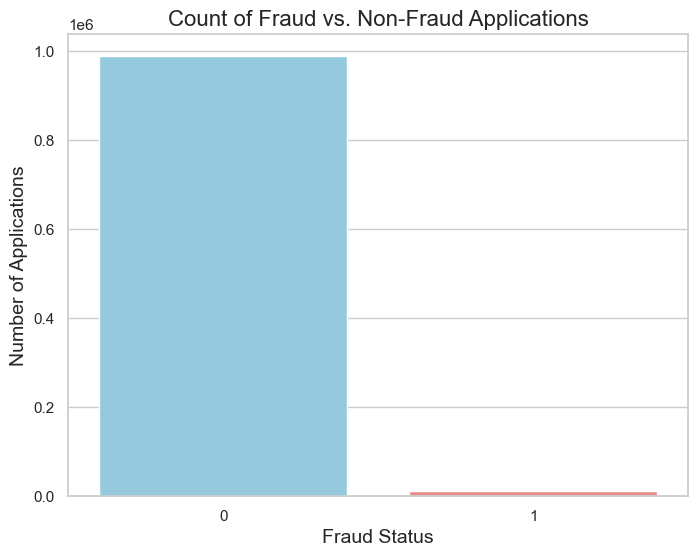

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(8, 6))

# Create a count plot
sns.countplot(x='fraud_bool', data=df, palette=['skyblue', 'lightcoral'])

# Customize the plot
plt.title('Count of Fraud vs. Non-Fraud Applications', fontsize=16)
plt.xlabel('Fraud Status', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)

# Show the plot
plt.show()


### 2.2 Dataset information

#### Read from datasheet.pdf

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [11]:
df.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [12]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [13]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

### 3.4 Checking the number of unique values of each column

In [14]:
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

### 3.5 Check statistics of data set

In [15]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


#### Insight
- Mean customer age is 33
- Some variables contains negative values, this indicate missing data that need to be processed

### 3.7 Exploring Data

In [16]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [17]:
df['device_fraud_count'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: device_fraud_count, Length: 1000000, dtype: int64>

In [18]:
# define numerical & categorical columns
num_features = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request'
                    , 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 
                    'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',  'session_length_in_minutes',
                    'device_distinct_emails', 'device_fraud_count', 'month']


cat_features = ['payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid','phone_mobile_valid', 'has_other_cards'
                        , 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'fraud_bool']

# print columns
print('We have {} numerical features : {}'.format(len(num_features), num_features))
print('\nWe have {} categorical features : {}'.format(len(cat_features), cat_features))

We have 20 numerical features : ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'device_distinct_emails', 'device_fraud_count', 'month']

We have 12 categorical features : ['payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'fraud_bool']


### 3.8 Visualizing distribution of all the variables
- Protected attributes, (age group, employment status and % income).

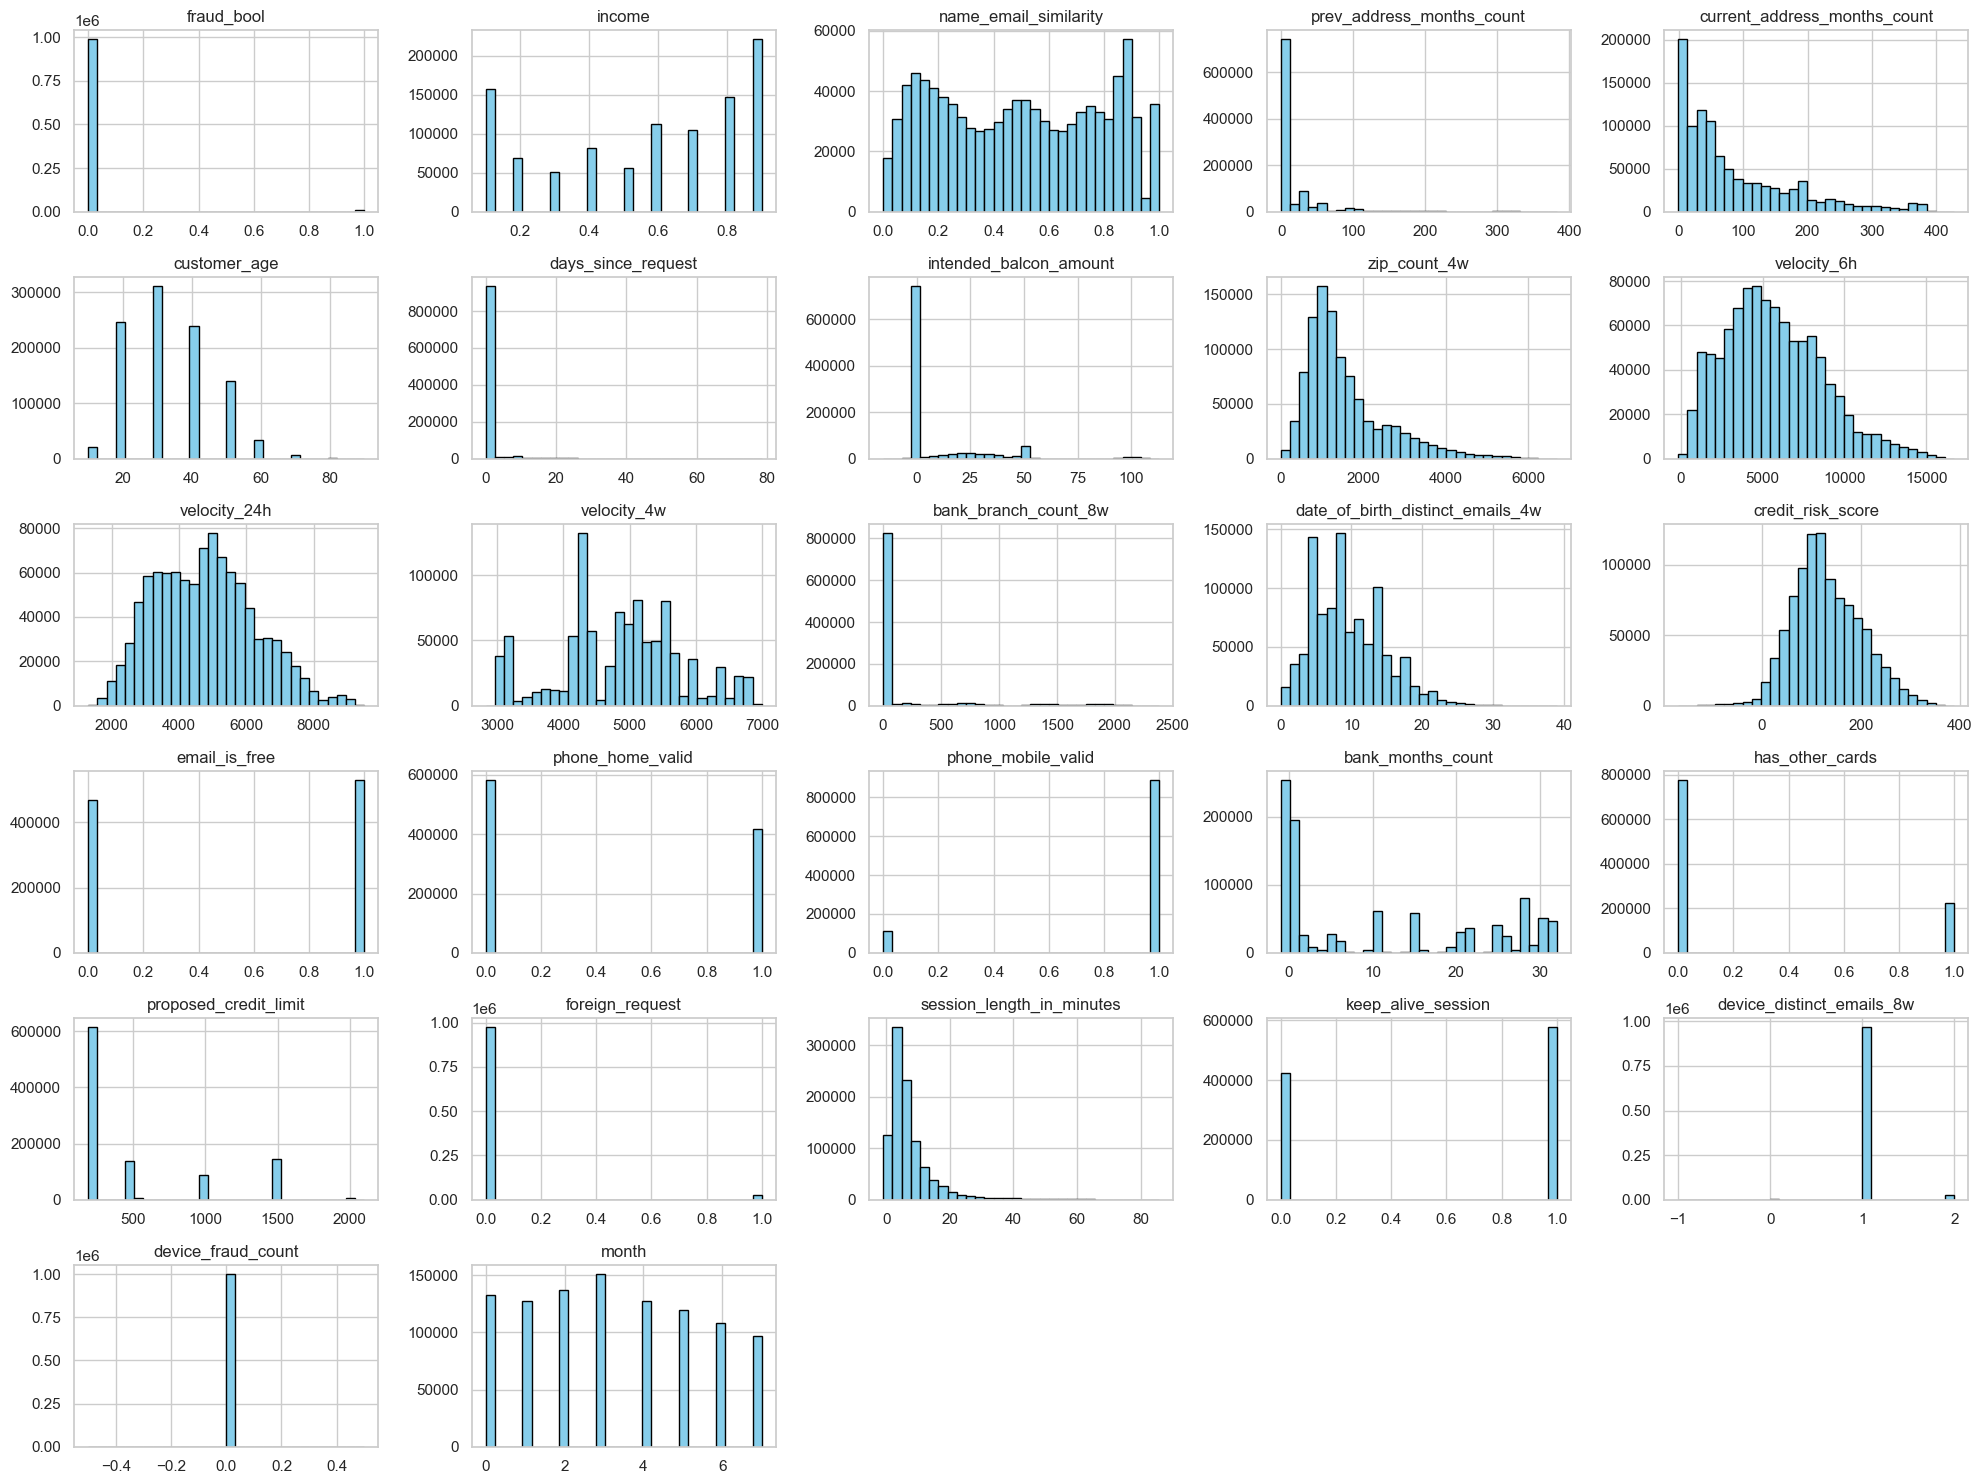

In [19]:
# Automatically plots histograms for all numerical columns
df.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')

plt.tight_layout()  # Adjusts subplot params for a neat layout
plt.show()

#### Insights:
- device_fraud_count only have unique value of 0 -> consider drop to reduce dimension


- Precision (Fraud_Detection) = TP / TP + FP = 157 / (157 + 9894) = 00156
- Recall (Fraud_Detection) = TP / TP + FN = 157 / (157 + 2049) = 0.0711

- Precision (Non-Fraud) = Actual and Labeled as Non Fraud / All Labeled non fraud = 187900 / (187900 + 2049) = 0.9892
- Recall (Non-Fraud) = Actual and Labeled as Non Fraud / All Actual Non Fraud = TN / (TN + FP) = 187900 / (187900 + 9894) = 0.95


- Accuracy = #Correctly Labeled instance / Total Instance = (187900 + 157) / 200,0000 = 0.94
- False Positive Rate = FP / (FP + TN) = Actual Non Fraud labeled as Fraud / Actual Non Fraud labeled as Fraud + Actual Non Fraud label as Non Fraud \
                                                    = 9894 / (9894 + 187900) = 0.05


In [47]:
# Cutom metrics for FPR <= 0.05
import numpy as np
from sklearn.metrics import roc_curve, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_val_score

def tpr_at_fixed_fpr(y_true, y_proba, fpr_target=0.05):
    """
    Returns the maximum TPR achieved at or below fpr_target (e.g. 0.05).
    
    :param y_true:   True binary labels (0 or 1).
    :param y_proba:  Predicted probabilities of class=1.
    :param fpr_target: The target (maximum) false-positive rate (e.g. 0.05).
    :return: The highest TPR achievable with FPR <= fpr_target.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_proba, pos_label=1)
    # Find all points where FPR <= desired threshold
    mask = (fpr <= fpr_target)
    
    if np.any(mask):
        return np.max(tpr[mask])  # best TPR among those points
    else:
        # If we can't reach FPR <= 0.05, return 0
        return 0
    
custom_scorer = make_scorer(
    tpr_at_fixed_fpr,
    needs_proba=True,      # We'll receive predicted probabilities
    greater_is_better=True # We want to maximize TPR
)
recall_scorer = make_scorer(recall_score, greater_is_better=True)

In [87]:
import lightgbm as lgb
import numpy as np
import optuna


def objective(trial):
    """
    Optuna objective function that returns the average TPR@5%FPR
    across CV folds for a LightGBM model in a pipeline with NearMiss.
    """

    # --- 1) Hyperparameter suggestions ---
    n_estimators = trial.suggest_int('n_estimators', 50, 120)
    max_depth = trial.suggest_int('max_depth', 7, 20)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.1, log=True)
    subsample = trial.suggest_float('subsample', 0.6, 0.8)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 0.8)
    
    # Optionally tune these as well:
    num_leaves = trial.suggest_int('num_leaves', 50, 150)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-2, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-2, 10, log=True)
    # scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)

    # --- 2) Instantiate LightGBM with suggested params ---
    lgb_clf = lgb.LGBMClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        num_leaves = num_leaves,
        reg_alpha=reg_alpha,
        reg_lambda = reg_lambda,
        random_state=42
        # If you included num_leaves, reg_alpha, etc., set them here.
    )

    # --- 3) Build Pipeline: NearMiss + LightGBM ---
    pipeline_lgb = ImbPipeline([
        ('resampler', NearMiss()),
        ('classifier', lgb_clf)
    ])

    # --- 4) Cross-Validation with your custom scorer ---
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline_lgb, 
                             X_train_preprocessed, y_train,
                             scoring=custom_scorer, 
                             cv=skf, 
                             n_jobs=-1)

    # --- 5) Return average TPR@5%FPR across folds ---
    return scores.mean()


In [88]:
# Fit on training data
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=7)  # Try 20 different hyperparameter sets

[I 2025-01-05 20:16:05,840] A new study created in memory with name: no-name-3cf13304-a466-480e-8907-62e82d6d5eaa
[I 2025-01-05 20:16:22,738] Trial 0 finished with value: 0.06358381502890173 and parameters: {'n_estimators': 64, 'max_depth': 9, 'learning_rate': 0.015350315223106658, 'subsample': 0.7355545625037642, 'colsample_bytree': 0.6085596440835097, 'num_leaves': 91, 'reg_alpha': 0.09020749606232092, 'reg_lambda': 7.537350392444874}. Best is trial 0 with value: 0.06358381502890173.
[I 2025-01-05 20:16:39,835] Trial 1 finished with value: 0.051456420718576444 and parameters: {'n_estimators': 50, 'max_depth': 13, 'learning_rate': 0.0038990357426572884, 'subsample': 0.6067582460016241, 'colsample_bytree': 0.6377129087601274, 'num_leaves': 111, 'reg_alpha': 0.10984705310829067, 'reg_lambda': 0.06811589721819429}. Best is trial 0 with value: 0.06358381502890173.
[I 2025-01-05 20:16:56,983] Trial 2 finished with value: 0.058483509010540634 and parameters: {'n_estimators': 57, 'max_depth'

In [98]:
print("Best Trial:", study.best_trial.number)
print("Best Value (Mean TPR@5%FPR):", study.best_value)
print("Best Params:", study.best_trial.params)

Best Trial: 0
Best Value (Mean TPR@5%FPR): 0.06358381502890173
Best Params: {'n_estimators': 64, 'max_depth': 9, 'learning_rate': 0.015350315223106658, 'subsample': 0.7355545625037642, 'colsample_bytree': 0.6085596440835097, 'num_leaves': 91, 'reg_alpha': 0.09020749606232092, 'reg_lambda': 7.537350392444874}


In [95]:
params = study.best_trial.params
final_model = XGBClassifier()
final_model.set_params(**params)
pipeline_lgb = ImbPipeline([
    ('resampler', NearMiss()),
    ('classifier', final_model)
])
pipeline_lgb.fit(X_train_preprocessed, y_train)
y_test_pred = pipeline_lgb.predict(X_test_preprocessed)


In [96]:
rep = classification_report(y_test, y_test_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.99      0.21      0.34    197794
           1       0.01      0.82      0.02      2206

    accuracy                           0.21    200000
   macro avg       0.50      0.51      0.18    200000
weighted avg       0.98      0.21      0.34    200000



In [97]:
y_train_pred = pipeline_lgb.predict(X_train_preprocessed)
rep = classification_report(y_train, y_train_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.99      0.21      0.34    791177
           1       0.01      0.83      0.02      8823

    accuracy                           0.21    800000
   macro avg       0.50      0.52      0.18    800000
weighted avg       0.98      0.21      0.34    800000



In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_preprocessed)

pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test_preprocessed)
X_test_pca = pca.transform(X_test_scaled)


In [82]:
import lightgbm as lgb
import numpy as np
import optuna


def objective(trial):
    """
    Optuna objective function that returns the average TPR@5%FPR
    across CV folds for a LightGBM model in a pipeline with NearMiss.
    """

    # --- 1) Hyperparameter suggestions ---
    n_estimators = trial.suggest_int('n_estimators', 50, 120)
    max_depth = trial.suggest_int('max_depth', 7, 20)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.1, log=True)
    subsample = trial.suggest_float('subsample', 0.6, 0.8)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 0.8)
    
    # Optionally tune these as well:
    num_leaves = trial.suggest_int('num_leaves', 50, 150)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-2, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-2, 10, log=True)
    # scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)

    # --- 2) Instantiate LightGBM with suggested params ---
    lgb_clf = lgb.LGBMClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        num_leaves = num_leaves,
        reg_alpha=reg_alpha,
        reg_lambda = reg_lambda,
        random_state=42
        # If you included num_leaves, reg_alpha, etc., set them here.
    )

    # --- 3) Build Pipeline: NearMiss + LightGBM ---
    pipeline_lgb = ImbPipeline([
        ('resampler', NearMiss()),
        ('classifier', lgb_clf)
    ])

    # --- 4) Cross-Validation with your custom scorer ---
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline_lgb, 
                             X_pca, y_train,
                             scoring=recall_scorer, 
                             cv=skf, 
                             n_jobs=-1)

    # --- 5) Return average TPR@5%FPR across folds ---
    return scores.mean()

In [83]:
# Fit on training data
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=7)  # Try 20 different hyperparameter sets

[I 2025-01-05 20:11:14,723] A new study created in memory with name: no-name-0b8f6e14-7ad5-4a72-983b-9d95361b14ba
[I 2025-01-05 20:11:32,954] Trial 0 finished with value: 0.8148022214666213 and parameters: {'n_estimators': 89, 'max_depth': 18, 'learning_rate': 0.00853034816404929, 'subsample': 0.6019051308175187, 'colsample_bytree': 0.536513426818499, 'num_leaves': 116, 'reg_alpha': 0.02230146005076824, 'reg_lambda': 2.4805821987446324}. Best is trial 0 with value: 0.8148022214666213.
[I 2025-01-05 20:11:52,138] Trial 1 finished with value: 0.7907741131134535 and parameters: {'n_estimators': 117, 'max_depth': 10, 'learning_rate': 0.008601796003128888, 'subsample': 0.6185577309191003, 'colsample_bytree': 0.5632790066406641, 'num_leaves': 135, 'reg_alpha': 0.11068995777246575, 'reg_lambda': 0.020973996579367223}. Best is trial 0 with value: 0.8148022214666213.
[I 2025-01-05 20:12:09,486] Trial 2 finished with value: 0.8234160716309645 and parameters: {'n_estimators': 54, 'max_depth': 20,

In [92]:
print("Best Trial:", study.best_trial.number)
print("Best Value (Mean TPR@5%FPR):", study.best_value)
print("Best Params:", study.best_trial.params)

Best Trial: 0
Best Value (Mean TPR@5%FPR): 0.06358381502890173
Best Params: {'n_estimators': 64, 'max_depth': 9, 'learning_rate': 0.015350315223106658, 'subsample': 0.7355545625037642, 'colsample_bytree': 0.6085596440835097, 'num_leaves': 91, 'reg_alpha': 0.09020749606232092, 'reg_lambda': 7.537350392444874}


In [93]:
params = study.best_trial.params
final_model = XGBClassifier()
final_model.set_params(**params)
pipeline_lgb = ImbPipeline([
    ('resampler', NearMiss()),
    ('classifier', final_model)
])
pipeline_lgb.fit(X_pca, y_train)
y_test_pred = pipeline_lgb.predict(X_test_pca)

tmp = classification_report(y_test, y_test_pred)
print(tmp)

              precision    recall  f1-score   support

           0       0.98      0.14      0.25    197794
           1       0.01      0.78      0.02      2206

    accuracy                           0.15    200000
   macro avg       0.50      0.46      0.13    200000
weighted avg       0.97      0.15      0.25    200000



# DUNG O DAY THOI